In [1]:
from os.path import join

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.misc import imread

from datasets.visual7w.common.data_provider import getDataProvider

In [67]:
# D = getDataProvider('visual7w-pointing',dataset_root="datasets/visual7w/datasets/visual7w-pointing/")
D = getDataProvider('visual7w-telling',dataset_root="datasets/visual7w/datasets/visual7w-telling/")

Initializing data provider for dataset visual7w-telling...
BasicDataProvider: reading datasets/visual7w/datasets/visual7w-telling/dataset.json


In [68]:
questions, image_ids,multiple_choice = [], [], []
for split in 'train test'.split():
    iterator = D.iterImageQAMultipleChoice(split=split)
    for i in iterator:
        image_id = i['image']['image_id']
        questions.append(i['mc']['question'])
        image_ids.append(image_id)

print("%d questions (%d different)" % (len(questions), len(set(questions))))
print("%d images (%d different)" % (len(image_ids), len(set(image_ids))))

111848 questions (51373 different)
111848 images (22975 different)


In [69]:
words = open('spatial_words.txt','r').read().split()

IQ = set()
for q,i in zip(questions, image_ids):
    qwords = set(q.lower().strip('?').split())
    if len(qwords.intersection(words))>=1:
        IQ.add((i,q))
spatial_questions = []
spatial_mc = []
spatial_image_ids = []
for i,q in IQ:
    spatial_questions.append(q)
    spatial_image_ids.append(i)
print("%d questions (%d different)" % (len(spatial_questions), len(set(spatial_questions))))
print("%d images (%d different)" % (len(spatial_image_ids), len(set(spatial_image_ids))))

8575 questions (7435 different)
8575 images (6267 different)


In [4]:
def add_rectangle(ax, ans, color):
    ax.add_patch(patches.Rectangle((ans['x'], ans['y']),
                              ans['width'],
                              ans['height'],
                              fill=False, color=color))

Which door is behind a person sitting on a bench?


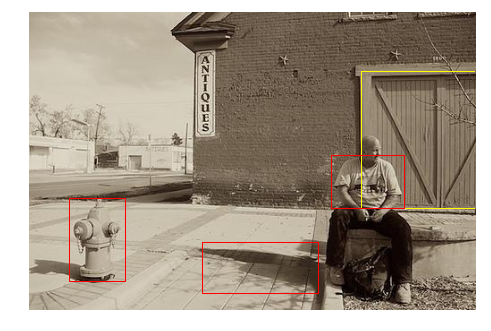

Which is the empty scene?


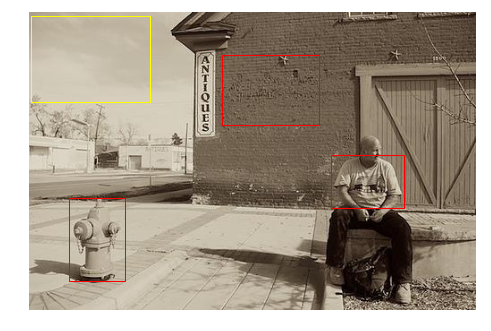

Which barn door is behind the man?


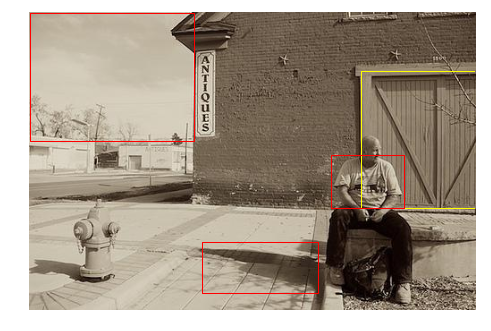

Which is the area made from the man and the sun?


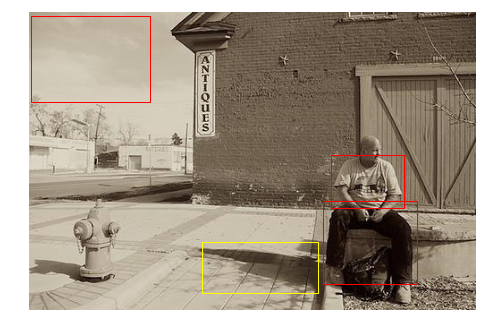

Which pants is the man wearing?


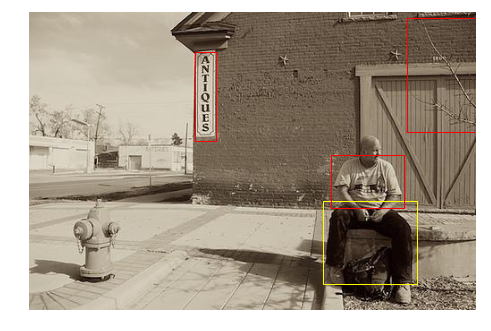

Which sidewalk is next to the man?


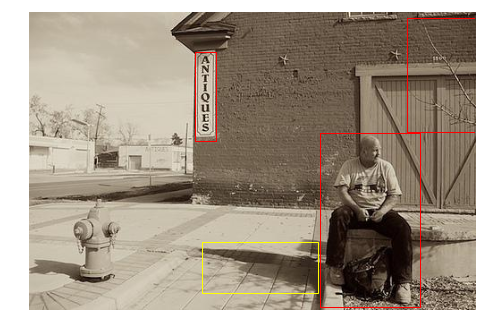

Which area has the better view of the sky?


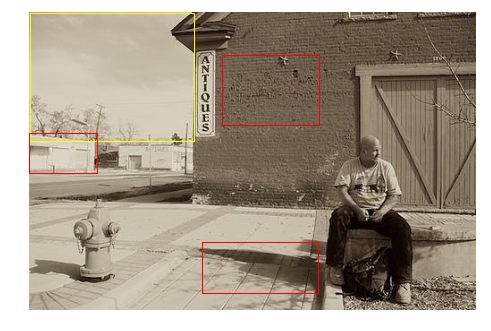

Which man's legs are on the bench?


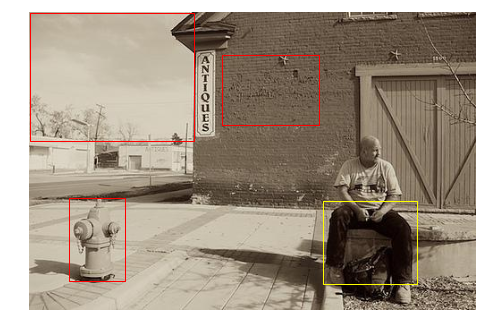

Which is the side of building near sign?


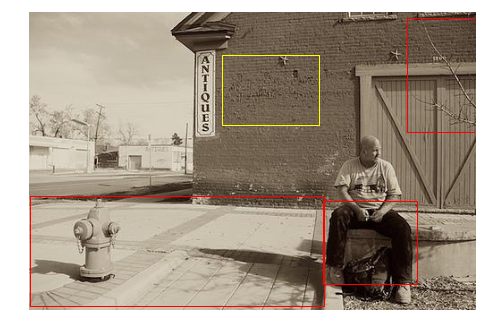

Which building is not an antique store?


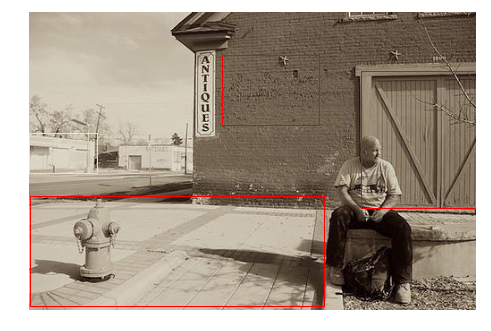

Which building is to the left of the road?


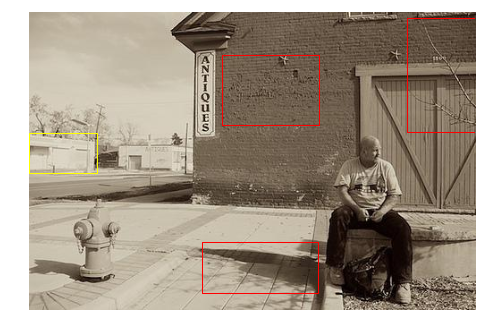

Which part of the brick wall is falling apart?


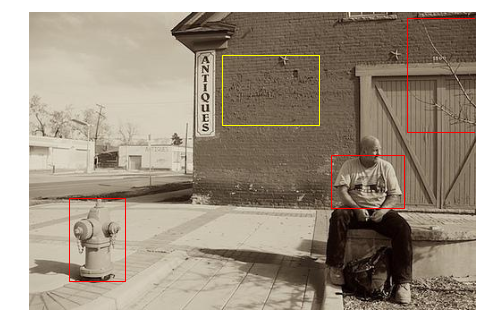

In [5]:
images_rootpath = 'datasets/visual7w/datasets/images/'
for i in iterator:
    break
image = i['image']
p = join(images_rootpath, image['filename'])
for q in image['qa_pairs']:
    answer = D.grounding_boxes[q['answer']]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, aspect='equal')
    add_rectangle(ax, answer,"yellow")
    for choice in q['multiple_choices']:
        ans = D.grounding_boxes[choice]
        add_rectangle(ax, ans, 'red')
    plt.imshow(imread(p))
    plt.axis('off')
    print(q['question'])
    plt.show()


In [17]:
datasets = "pointing telling".split()

In [18]:
words = set("behind close far left right top bottom \
         big small up down back above below between near \
         under corner upper".split())
for dataset in datasets:
    D = getDataProvider('visual7w-%s'%dataset,dataset_root="datasets/visual7w/datasets/visual7w-%s/" % dataset)
    print(dataset)
    for split in splits:
        print(split)
        questions = []
        iterator = D.iterQAPairs(split)
        for i in iterator:
            questions.append(i['question'])
        print('\t%d questions with %d different' % (len(questions),len(set(questions))))

        spatial_questions = []
        for q in questions:
            for w in words:
                if w in q:
                    spatial_questions.append(q)
                    break
        print('\t%d spatial questions with %d different' % (len(spatial_questions),len(set(spatial_questions))))
    print('-'*50)

Initializing data provider for dataset visual7w-pointing...
BasicDataProvider: reading datasets/visual7w/datasets/visual7w-pointing/dataset.json
pointing
train
	93813 questions with 85029 different
	27152 spatial questions with 26423 different
test
	57265 questions with 52731 different
	16587 spatial questions with 16260 different
--------------------------------------------------
Initializing data provider for dataset visual7w-telling...
BasicDataProvider: reading datasets/visual7w/datasets/visual7w-telling/dataset.json
telling
train
	69817 questions with 34544 different
	6037 spatial questions with 4641 different
test
	42031 questions with 22304 different
	3595 spatial questions with 2833 different
--------------------------------------------------
